In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [2]:
dataSet = pd.read_csv('dataset.csv')
dataSet

,Total Revenue,Total Cost
0,2408445.08,1811154.16
1,2153286.80,1344707.70
2,2045322.72,1768017.12
3,3048155.25,2634885.25
4,406257.50,231292.25
...,...,...
49995,1396381.60,872027.40
49996,3778971.63,3046342.88
49997,137142.94,95092.26
49998,526729.60,172748.80


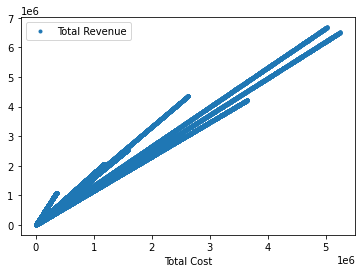

In [3]:
dataSet.plot(x='Total Cost',y='Total Revenue',style='.')
plt.show()

In [4]:
x = dataSet.iloc[:,1].values
y = dataSet.iloc[:,:-1].values
x

array([1811154.16, 1344707.7 , 1768017.12, ...,   95092.26,  172748.8 ,
        362174.19])

In [5]:
x_train,x_test,y_train,y_test = train_test_split(y,x, test_size=0.2)
print('Training data\n',x_train)
print('Training data',y_train)
print('Testing data\n',x_test)
print('Testing data',y_test)

Training data
 [[1149228.36]
 [  15105.27]
 [4023564.93]
 ...
 [3081906.45]
 [ 603298.96]
 [ 570004.48]]
Training data [ 993415.56   11203.48 3478048.53 ... 2664060.45  356081.88  186941.44]
Testing data
 [[1027677.2 ]
 [ 254759.05]
 [ 684748.48]
 ...
 [  65459.28]
 [1433652.48]
 [2322792.72]]
Testing data [ 585081.56  170680.51  224573.44 ...   48550.72  895302.72 1450562.58]


In [6]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)
print(regressor.intercept_)
print(regressor.coef_)

-90254.71048428142
[0.77360328]


In [7]:
y_pred = regressor.predict(x_test)
print(y_pred)

[ 704759.74185006  106827.72611446  439468.95937428 ...  -39615.19679321
 1018823.54991205 1706665.35563862]


In [8]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
0,585081.56,7.047597e+05
1,170680.51,1.068277e+05
2,224573.44,4.394690e+05
3,701888.67,8.297059e+05
4,202131.86,1.844040e+05
...,...,...
9995,52716.56,-3.527013e+04
9996,97372.77,2.218029e+04
9997,48550.72,-3.961520e+04
9998,895302.72,1.018824e+06


In [9]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
print('MSE : ',mean_squared_error(y_test,y_pred))
print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('r2_stat : %.2f'%r2_score(y_test,y_pred))

MSE :  32601746837.29194
RMSE :  180559.53820635437
r2_stat : 0.97
